In [91]:
import pandas as pd

In [92]:
df = pd.read_csv('energydata_complete.csv')

In [93]:
#dropping columns
from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler()
df = df.drop(columns = ['date', 'lights'])

In [94]:
#scaling the dataset
normalized_df = pd.DataFrame(scalar.fit_transform(df), columns = df.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [95]:
target_var   =   df[  'Appliances' ]

In [96]:
#splitting and training the model with 70:30 train-test ratio split
from   sklearn.model_selection   import   train_test_split
x_train,   x_test,   y_train,   y_test   =   train_test_split(normalized_df,   target_var,
test_size=  0.3  ,   random_state=  42  )

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


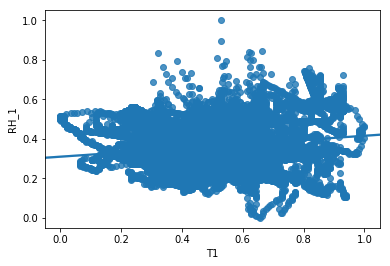

In [97]:
#running a regression plot
import seaborn as sns
sns.regplot(x="T1",y="RH_1", data=normalized_df)

In [98]:
#running a multiple linear regression
from sklearn.linear_model import LinearRegression
linear_model   =   LinearRegression()
#fit   the   model   to   the   training   dataset
linear_model.fit(x_train,   y_train)
#obtain   predictions
predicted_values   =   linear_model.predict(x_test)
predicted_values

array([ 40.,  90.,  50., ...,  50., 110.,  50.])

In [99]:
#running a r_squared
from sklearn.metrics import r2_score
r2_score = r2_score(y_test,predicted_values)
round(r2_score,2)

1.0

In [100]:
#Mean Absolute Error
from   sklearn.metrics   import   mean_absolute_error
mae   =   mean_absolute_error(y_test,   predicted_values)
round(mae,   2)

0.0

In [101]:
#Residual   Sum   of   Squares   (RSS)   
import   numpy   as   np
rss   =   np.sum(np.square(y_test   -   predicted_values))
round(rss,   2)  

0.0

In [102]:
#Root Mean Square Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,2)

0.0

In [103]:
def   get_weights_df(model,   feat,   col_name)  :
#this   function   returns   the   weight   of   every   feature
    weights   =   pd.Series(model.coef_,   feat.columns).sort_values()
    weights_df   =   pd.DataFrame(weights).reset_index()
    weights_df.columns   =   [  'Features'  ,   col_name]
    weights_df[col_name].round(  3  )
    return   weights_df
linear_model_weights   =   get_weights_df(linear_model,   x_train,   'Linear_Model_Weights'  )
final_weights   =   linear_model_weights

In [104]:
print(final_weights)

       Features  Linear_Model_Weights
0          RH_2         -1.111684e-12
1            T7         -7.437138e-13
2          RH_8         -5.977643e-13
3            T1         -5.960044e-13
4     Windspeed         -4.136006e-13
5            T6         -4.134117e-13
6    Visibility         -3.563608e-13
7            T2         -3.173855e-13
8          RH_4         -2.048643e-13
9   Press_mm_hg         -1.793349e-13
10           T5         -1.635889e-13
11         RH_5         -1.317290e-13
12          rv1         -9.489360e-14
13          rv2         -9.489360e-14
14    Tdewpoint          5.433920e-14
15         RH_9          6.844190e-14
16           T3          1.016150e-13
17           T4          1.188636e-13
18         RH_6          1.479174e-13
19         RH_3          1.583286e-13
20           T9          2.410607e-13
21       RH_out          4.585378e-13
22           T8          4.606176e-13
23         RH_1          5.268717e-13
24         RH_7          7.748509e-13
25        T_

In [105]:
#Ridge Regression
from sklearn.linear_model import Ridge
ridge_reg = Ridge (alpha = 0.4)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.4, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [106]:
#Root Mean Square Error
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,2)

0.0

In [107]:
#Feature Selection/LASSO Regression
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha = 0.001)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.001, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [108]:
def   get_weights_df(model,   feat,   col_name)  :
#this   function   returns   the   weight   of   every   feature
    weights   =   pd.Series(model.coef_,   feat.columns).sort_values()
    weights_df   =   pd.DataFrame(weights).reset_index()
    weights_df.columns   =   [  'Features'  ,   col_name]
    weights_df[col_name].round(  3  )
    return   weights_df
linear_model_weights   =   get_weights_df(linear_model,   x_train,   'Linear_Model_Weights'  )
final_weights   =   linear_model_weights

In [109]:
final_weights

,Features,Linear_Model_Weights
0,RH_2,-1.111684e-12
1,T7,-7.437138e-13
2,RH_8,-5.977643e-13
3,T1,-5.960044e-13
4,Windspeed,-4.136006e-13
5,T6,-4.134117e-13
6,Visibility,-3.563608e-13
7,T2,-3.173855e-13
8,RH_4,-2.048643e-13
9,Press_mm_hg,-1.793349e-13


In [110]:
#new RMSE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test,predicted_values))
round(rmse,2)

0.0